In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Read in our Data 
file_path = '/Users/matt/Desktop/Smart-Analytics-for-Unhoused-Initiatives/Resources/Data /2007-2023-PIT-Counts-by-CoC.xlsb'

# Read the XLSB file
coc_df = pd.read_excel(file_path, engine='pyxlsb')

# Preview the dataframe
coc_df.head()

,CoC Number,CoC Name,CoC Category,Count Types,Overall Homeless,Overall Homeless - Under 18,Overall Homeless - Age 18 to 24,Overall Homeless - Age 25 to 34,Overall Homeless - Age 35 to 44,Overall Homeless - Age 45 to 54,...,Overall Homeless Parenting Youth Age 18-24,Sheltered ES Homeless Parenting Youth Age 18-24,Sheltered TH Homeless Parenting Youth Age 18-24,Sheltered Total Homeless Parenting Youth Age 18-24,Unsheltered Homeless Parenting Youth Age 18-24,Overall Homeless Children of Parenting Youth,Sheltered ES Homeless Children of Parenting Youth,Sheltered TH Homeless Children of Parenting Youth,Sheltered Total Homeless Children of Parenting Youth,Unsheltered Homeless Children of Parenting Youth
0,AK-500,Anchorage CoC,Other Largely Urban CoC,Sheltered and Unsheltered Count,1760.0,185.0,161.0,377.0,419.0,315.0,...,10.0,5.0,5.0,10.0,0.0,10.0,5.0,5.0,10.0,0.0
1,AK-501,Alaska Balance of State CoC,Largely Rural CoC,Sheltered and Unsheltered Count,854.0,176.0,66.0,124.0,190.0,144.0,...,8.0,8.0,0.0,8.0,0.0,7.0,7.0,0.0,7.0,0.0
2,AL-500,"Birmingham/Jefferson, St. Clair, Shelby Counti...",Largely Suburban CoC,Sheltered and Unsheltered Count,847.0,67.0,42.0,127.0,182.0,180.0,...,2.0,1.0,1.0,2.0,0.0,2.0,1.0,1.0,2.0,0.0
3,AL-501,Mobile City & County/Baldwin County CoC,Other Largely Urban CoC,Sheltered and Unsheltered Count,670.0,110.0,19.0,78.0,156.0,120.0,...,2.0,2.0,0.0,2.0,0.0,2.0,2.0,0.0,2.0,0.0
4,AL-502,Florence/Northwest Alabama CoC,Largely Rural CoC,Sheltered and Unsheltered Count,195.0,63.0,9.0,42.0,36.0,23.0,...,4.0,2.0,0.0,2.0,2.0,4.0,2.0,0.0,2.0,2.0


In [3]:
# Add a State Column - Extract from 'CoC Number'
coc_df['State'] = coc_df['CoC Number'].str[:2]
coc_df.head()

,CoC Number,CoC Name,CoC Category,Count Types,Overall Homeless,Overall Homeless - Under 18,Overall Homeless - Age 18 to 24,Overall Homeless - Age 25 to 34,Overall Homeless - Age 35 to 44,Overall Homeless - Age 45 to 54,...,Sheltered ES Homeless Parenting Youth Age 18-24,Sheltered TH Homeless Parenting Youth Age 18-24,Sheltered Total Homeless Parenting Youth Age 18-24,Unsheltered Homeless Parenting Youth Age 18-24,Overall Homeless Children of Parenting Youth,Sheltered ES Homeless Children of Parenting Youth,Sheltered TH Homeless Children of Parenting Youth,Sheltered Total Homeless Children of Parenting Youth,Unsheltered Homeless Children of Parenting Youth,State
0,AK-500,Anchorage CoC,Other Largely Urban CoC,Sheltered and Unsheltered Count,1760.0,185.0,161.0,377.0,419.0,315.0,...,5.0,5.0,10.0,0.0,10.0,5.0,5.0,10.0,0.0,AK
1,AK-501,Alaska Balance of State CoC,Largely Rural CoC,Sheltered and Unsheltered Count,854.0,176.0,66.0,124.0,190.0,144.0,...,8.0,0.0,8.0,0.0,7.0,7.0,0.0,7.0,0.0,AK
2,AL-500,"Birmingham/Jefferson, St. Clair, Shelby Counti...",Largely Suburban CoC,Sheltered and Unsheltered Count,847.0,67.0,42.0,127.0,182.0,180.0,...,1.0,1.0,2.0,0.0,2.0,1.0,1.0,2.0,0.0,AL
3,AL-501,Mobile City & County/Baldwin County CoC,Other Largely Urban CoC,Sheltered and Unsheltered Count,670.0,110.0,19.0,78.0,156.0,120.0,...,2.0,0.0,2.0,0.0,2.0,2.0,0.0,2.0,0.0,AL
4,AL-502,Florence/Northwest Alabama CoC,Largely Rural CoC,Sheltered and Unsheltered Count,195.0,63.0,9.0,42.0,36.0,23.0,...,2.0,0.0,2.0,2.0,4.0,2.0,0.0,2.0,2.0,AL


In [4]:
# Reorder the columns with 'State' column at the front
coc_df = coc_df[['State'] + [col for col in coc_df.columns if col != 'State']]
coc_df.head()

,State,CoC Number,CoC Name,CoC Category,Count Types,Overall Homeless,Overall Homeless - Under 18,Overall Homeless - Age 18 to 24,Overall Homeless - Age 25 to 34,Overall Homeless - Age 35 to 44,...,Overall Homeless Parenting Youth Age 18-24,Sheltered ES Homeless Parenting Youth Age 18-24,Sheltered TH Homeless Parenting Youth Age 18-24,Sheltered Total Homeless Parenting Youth Age 18-24,Unsheltered Homeless Parenting Youth Age 18-24,Overall Homeless Children of Parenting Youth,Sheltered ES Homeless Children of Parenting Youth,Sheltered TH Homeless Children of Parenting Youth,Sheltered Total Homeless Children of Parenting Youth,Unsheltered Homeless Children of Parenting Youth
0,AK,AK-500,Anchorage CoC,Other Largely Urban CoC,Sheltered and Unsheltered Count,1760.0,185.0,161.0,377.0,419.0,...,10.0,5.0,5.0,10.0,0.0,10.0,5.0,5.0,10.0,0.0
1,AK,AK-501,Alaska Balance of State CoC,Largely Rural CoC,Sheltered and Unsheltered Count,854.0,176.0,66.0,124.0,190.0,...,8.0,8.0,0.0,8.0,0.0,7.0,7.0,0.0,7.0,0.0
2,AL,AL-500,"Birmingham/Jefferson, St. Clair, Shelby Counti...",Largely Suburban CoC,Sheltered and Unsheltered Count,847.0,67.0,42.0,127.0,182.0,...,2.0,1.0,1.0,2.0,0.0,2.0,1.0,1.0,2.0,0.0
3,AL,AL-501,Mobile City & County/Baldwin County CoC,Other Largely Urban CoC,Sheltered and Unsheltered Count,670.0,110.0,19.0,78.0,156.0,...,2.0,2.0,0.0,2.0,0.0,2.0,2.0,0.0,2.0,0.0
4,AL,AL-502,Florence/Northwest Alabama CoC,Largely Rural CoC,Sheltered and Unsheltered Count,195.0,63.0,9.0,42.0,36.0,...,4.0,2.0,0.0,2.0,2.0,4.0,2.0,0.0,2.0,2.0


In [5]:
# Inspect data types
coc_df.dtypes

State                                                    object
CoC Number                                               object
CoC Name                                                 object
CoC Category                                             object
Count Types                                              object
                                                         ...   
Overall Homeless Children of Parenting Youth            float64
Sheltered ES Homeless Children of Parenting Youth       float64
Sheltered TH Homeless Children of Parenting Youth       float64
Sheltered Total Homeless Children of Parenting Youth    float64
Unsheltered Homeless Children of Parenting Youth        float64
Length: 646, dtype: object

In [6]:
# Count the number of CoC locations
coc_locations = coc_df['CoC Number'].nunique()
print(f"There are {coc_locations} unique CoC locations in this dataset")

There are 387 unique CoC locations in this dataset


In [7]:
# Group by CoC Number
group_coc_df = coc_df.groupby('CoC Number')
group_coc_df.head()

,State,CoC Number,CoC Name,CoC Category,Count Types,Overall Homeless,Overall Homeless - Under 18,Overall Homeless - Age 18 to 24,Overall Homeless - Age 25 to 34,Overall Homeless - Age 35 to 44,...,Overall Homeless Parenting Youth Age 18-24,Sheltered ES Homeless Parenting Youth Age 18-24,Sheltered TH Homeless Parenting Youth Age 18-24,Sheltered Total Homeless Parenting Youth Age 18-24,Unsheltered Homeless Parenting Youth Age 18-24,Overall Homeless Children of Parenting Youth,Sheltered ES Homeless Children of Parenting Youth,Sheltered TH Homeless Children of Parenting Youth,Sheltered Total Homeless Children of Parenting Youth,Unsheltered Homeless Children of Parenting Youth
0,AK,AK-500,Anchorage CoC,Other Largely Urban CoC,Sheltered and Unsheltered Count,1760.0,185.0,161.0,377.0,419.0,...,10.0,5.0,5.0,10.0,0.0,10.0,5.0,5.0,10.0,0.0
1,AK,AK-501,Alaska Balance of State CoC,Largely Rural CoC,Sheltered and Unsheltered Count,854.0,176.0,66.0,124.0,190.0,...,8.0,8.0,0.0,8.0,0.0,7.0,7.0,0.0,7.0,0.0
2,AL,AL-500,"Birmingham/Jefferson, St. Clair, Shelby Counti...",Largely Suburban CoC,Sheltered and Unsheltered Count,847.0,67.0,42.0,127.0,182.0,...,2.0,1.0,1.0,2.0,0.0,2.0,1.0,1.0,2.0,0.0
3,AL,AL-501,Mobile City & County/Baldwin County CoC,Other Largely Urban CoC,Sheltered and Unsheltered Count,670.0,110.0,19.0,78.0,156.0,...,2.0,2.0,0.0,2.0,0.0,2.0,2.0,0.0,2.0,0.0
4,AL,AL-502,Florence/Northwest Alabama CoC,Largely Rural CoC,Sheltered and Unsheltered Count,195.0,63.0,9.0,42.0,36.0,...,4.0,2.0,0.0,2.0,2.0,4.0,2.0,0.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
382,WV,WV-503,"Charleston/Kanawha, Putnam, Boone, Clay Counti...",Largely Suburban CoC,Sheltered and Unsheltered Count,293.0,20.0,40.0,53.0,66.0,...,1.0,1.0,0.0,1.0,0.0,3.0,3.0,0.0,3.0,0.0
383,WV,WV-508,West Virginia Balance of State CoC,Largely Rural CoC,Sheltered and Unsheltered Count,766.0,50.0,74.0,168.0,209.0,...,4.0,4.0,0.0,4.0,0.0,5.0,5.0,0.0,5.0,0.0
384,WY,WY-500,Wyoming Statewide CoC,Largely Rural CoC,Sheltered and Unsheltered Count,532.0,37.0,62.0,73.0,116.0,...,3.0,2.0,1.0,3.0,0.0,4.0,3.0,1.0,4.0,0.0
387,a,a MO-604 covers territory in both Missouri and...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# Drop rows containing all NaN values from each group
cleaned_coc_df = group_coc_df.apply(lambda x: x.dropna(how='all'))

# Print the cleaned DataFrame
cleaned_coc_df.tail()

,,State,CoC Number,CoC Name,CoC Category,Count Types,Overall Homeless,Overall Homeless - Under 18,Overall Homeless - Age 18 to 24,Overall Homeless - Age 25 to 34,Overall Homeless - Age 35 to 44,...,Overall Homeless Parenting Youth Age 18-24,Sheltered ES Homeless Parenting Youth Age 18-24,Sheltered TH Homeless Parenting Youth Age 18-24,Sheltered Total Homeless Parenting Youth Age 18-24,Unsheltered Homeless Parenting Youth Age 18-24,Overall Homeless Children of Parenting Youth,Sheltered ES Homeless Children of Parenting Youth,Sheltered TH Homeless Children of Parenting Youth,Sheltered Total Homeless Children of Parenting Youth,Unsheltered Homeless Children of Parenting Youth
CoC Number,,,,,,,,,,,,,,,,,,,,,,
WV-501,381,WV,WV-501,"Huntington/Cabell, Wayne Counties CoC",Largely Rural CoC,Sheltered and Unsheltered Count,244.0,18.0,19.0,51.0,72.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
WV-503,382,WV,WV-503,"Charleston/Kanawha, Putnam, Boone, Clay Counti...",Largely Suburban CoC,Sheltered and Unsheltered Count,293.0,20.0,40.0,53.0,66.0,...,1.0,1.0,0.0,1.0,0.0,3.0,3.0,0.0,3.0,0.0
WV-508,383,WV,WV-508,West Virginia Balance of State CoC,Largely Rural CoC,Sheltered and Unsheltered Count,766.0,50.0,74.0,168.0,209.0,...,4.0,4.0,0.0,4.0,0.0,5.0,5.0,0.0,5.0,0.0
WY-500,384,WY,WY-500,Wyoming Statewide CoC,Largely Rural CoC,Sheltered and Unsheltered Count,532.0,37.0,62.0,73.0,116.0,...,3.0,2.0,1.0,3.0,0.0,4.0,3.0,1.0,4.0,0.0
"a MO-604 covers territory in both Missouri and Kansas. The record described in this file represents the CoC's total territory, the sum of the point-in-time estimates the CoC separately reported for the portions of its territory in MO and in KS. However, in the companion file, Point-in-Time Estimates by State, MO-604's data have been split up between MO and KS.",387,a,a MO-604 covers territory in both Missouri and...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
# Print the cleaned DataFrame
cleaned_coc_df.head()

,,State,CoC Number,CoC Name,CoC Category,Count Types,Overall Homeless,Overall Homeless - Under 18,Overall Homeless - Age 18 to 24,Overall Homeless - Age 25 to 34,Overall Homeless - Age 35 to 44,...,Overall Homeless Parenting Youth Age 18-24,Sheltered ES Homeless Parenting Youth Age 18-24,Sheltered TH Homeless Parenting Youth Age 18-24,Sheltered Total Homeless Parenting Youth Age 18-24,Unsheltered Homeless Parenting Youth Age 18-24,Overall Homeless Children of Parenting Youth,Sheltered ES Homeless Children of Parenting Youth,Sheltered TH Homeless Children of Parenting Youth,Sheltered Total Homeless Children of Parenting Youth,Unsheltered Homeless Children of Parenting Youth
CoC Number,,,,,,,,,,,,,,,,,,,,,,
* File does not contain the imputed ages for people experiencing unsheltered homelessness over age 24 for the 22 CoCs that did not conduct an unsheltered count in 2023.,388,*,* File does not contain the imputed ages for p...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AK-500,0,AK,AK-500,Anchorage CoC,Other Largely Urban CoC,Sheltered and Unsheltered Count,1760.0,185.0,161.0,377.0,419.0,...,10.0,5.0,5.0,10.0,0.0,10.0,5.0,5.0,10.0,0.0
AK-501,1,AK,AK-501,Alaska Balance of State CoC,Largely Rural CoC,Sheltered and Unsheltered Count,854.0,176.0,66.0,124.0,190.0,...,8.0,8.0,0.0,8.0,0.0,7.0,7.0,0.0,7.0,0.0
AL-500,2,AL,AL-500,"Birmingham/Jefferson, St. Clair, Shelby Counti...",Largely Suburban CoC,Sheltered and Unsheltered Count,847.0,67.0,42.0,127.0,182.0,...,2.0,1.0,1.0,2.0,0.0,2.0,1.0,1.0,2.0,0.0
AL-501,3,AL,AL-501,Mobile City & County/Baldwin County CoC,Other Largely Urban CoC,Sheltered and Unsheltered Count,670.0,110.0,19.0,78.0,156.0,...,2.0,2.0,0.0,2.0,0.0,2.0,2.0,0.0,2.0,0.0


In [10]:
# Select all rows starting from the second row
cleaned_coc_df = cleaned_coc_df.iloc[1:]

# Reset index after dropping rows
cleaned_coc_df.reset_index(drop=True, inplace=True)

cleaned_coc_df.head()

,State,CoC Number,CoC Name,CoC Category,Count Types,Overall Homeless,Overall Homeless - Under 18,Overall Homeless - Age 18 to 24,Overall Homeless - Age 25 to 34,Overall Homeless - Age 35 to 44,...,Overall Homeless Parenting Youth Age 18-24,Sheltered ES Homeless Parenting Youth Age 18-24,Sheltered TH Homeless Parenting Youth Age 18-24,Sheltered Total Homeless Parenting Youth Age 18-24,Unsheltered Homeless Parenting Youth Age 18-24,Overall Homeless Children of Parenting Youth,Sheltered ES Homeless Children of Parenting Youth,Sheltered TH Homeless Children of Parenting Youth,Sheltered Total Homeless Children of Parenting Youth,Unsheltered Homeless Children of Parenting Youth
0,AK,AK-500,Anchorage CoC,Other Largely Urban CoC,Sheltered and Unsheltered Count,1760.0,185.0,161.0,377.0,419.0,...,10.0,5.0,5.0,10.0,0.0,10.0,5.0,5.0,10.0,0.0
1,AK,AK-501,Alaska Balance of State CoC,Largely Rural CoC,Sheltered and Unsheltered Count,854.0,176.0,66.0,124.0,190.0,...,8.0,8.0,0.0,8.0,0.0,7.0,7.0,0.0,7.0,0.0
2,AL,AL-500,"Birmingham/Jefferson, St. Clair, Shelby Counti...",Largely Suburban CoC,Sheltered and Unsheltered Count,847.0,67.0,42.0,127.0,182.0,...,2.0,1.0,1.0,2.0,0.0,2.0,1.0,1.0,2.0,0.0
3,AL,AL-501,Mobile City & County/Baldwin County CoC,Other Largely Urban CoC,Sheltered and Unsheltered Count,670.0,110.0,19.0,78.0,156.0,...,2.0,2.0,0.0,2.0,0.0,2.0,2.0,0.0,2.0,0.0
4,AL,AL-502,Florence/Northwest Alabama CoC,Largely Rural CoC,Sheltered and Unsheltered Count,195.0,63.0,9.0,42.0,36.0,...,4.0,2.0,0.0,2.0,2.0,4.0,2.0,0.0,2.0,2.0


In [11]:
# List the Top 10 Locations with the Most Overall Homeless
Most_Overall_Homeless_df = cleaned_coc_df.sort_values(by='Overall Homeless', ascending=False)
Busiest_Locations_df = Most_Overall_Homeless_df.head(10)
Busiest_Locations_df

,State,CoC Number,CoC Name,CoC Category,Count Types,Overall Homeless,Overall Homeless - Under 18,Overall Homeless - Age 18 to 24,Overall Homeless - Age 25 to 34,Overall Homeless - Age 35 to 44,...,Overall Homeless Parenting Youth Age 18-24,Sheltered ES Homeless Parenting Youth Age 18-24,Sheltered TH Homeless Parenting Youth Age 18-24,Sheltered Total Homeless Parenting Youth Age 18-24,Unsheltered Homeless Parenting Youth Age 18-24,Overall Homeless Children of Parenting Youth,Sheltered ES Homeless Children of Parenting Youth,Sheltered TH Homeless Children of Parenting Youth,Sheltered Total Homeless Children of Parenting Youth,Unsheltered Homeless Children of Parenting Youth
271,NY,NY-600,New York City CoC,Major City CoC,Sheltered and Unsheltered Count,88025.0,25200.0,9130.0,19577.0,13812.0,...,2251.0,2241.0,10.0,2251.0,0.0,2234.0,2223.0,11.0,2234.0,0.0
49,CA,CA-600,Los Angeles City & County CoC,Major City CoC,Sheltered and Unsheltered Count,71320.0,6230.0,3718.0,13738.0,16597.0,...,510.0,175.0,57.0,232.0,278.0,513.0,283.0,70.0,353.0,160.0
370,WA,WA-500,Seattle/King County CoC,Major City CoC,Sheltered-Only Count*,14149.0,2448.0,887.0,994.0,1162.0,...,56.0,23.0,33.0,56.0,0.0,68.0,30.0,38.0,68.0,0.0
50,CA,CA-601,San Diego City and County CoC,Major City CoC,Sheltered and Unsheltered Count,10264.0,1277.0,739.0,1632.0,2059.0,...,93.0,46.0,42.0,88.0,5.0,134.0,79.0,52.0,131.0,3.0
63,CO,CO-503,Metropolitan Denver CoC,Major City CoC,Sheltered and Unsheltered Count,10054.0,1726.0,507.0,1737.0,2114.0,...,53.0,20.0,32.0,52.0,1.0,64.0,24.0,39.0,63.0,1.0
18,CA,CA-500,San Jose/Santa Clara City & County CoC,Major City CoC,Sheltered and Unsheltered Count,9903.0,780.0,1029.0,1311.0,1953.0,...,41.0,18.0,17.0,35.0,6.0,42.0,23.0,15.0,38.0,4.0
20,CA,CA-502,"Oakland, Berkeley/Alameda County CoC",Major City CoC,Sheltered-Only Count*,9759.0,592.0,814.0,390.0,517.0,...,46.0,12.0,22.0,34.0,12.0,69.0,14.0,32.0,46.0,23.0
17,AZ,AZ-502,"Phoenix, Mesa/Maricopa County CoC",Major City CoC,Sheltered and Unsheltered Count,9642.0,1133.0,722.0,2069.0,2069.0,...,24.0,16.0,8.0,24.0,0.0,22.0,15.0,7.0,22.0,0.0
21,CA,CA-503,Sacramento City & County CoC,Major City CoC,Sheltered-Only Count*,9281.0,713.0,621.0,359.0,432.0,...,71.0,18.0,27.0,45.0,26.0,80.0,23.0,31.0,54.0,26.0
343,TX,TX-607,Texas Balance of State CoC,Largely Rural CoC,Sheltered and Unsheltered Count,9065.0,1239.0,589.0,1579.0,1941.0,...,70.0,46.0,18.0,64.0,6.0,119.0,83.0,25.0,108.0,11.0


In [12]:
# List the Top 10 Locations with the Least Overall Homeless
Least_Overall_Homeless_df = cleaned_coc_df.sort_values(by='Overall Homeless', ascending=True)
Least_Busy_Locations_df = Least_Overall_Homeless_df.head(10)
Least_Busy_Locations_df

,State,CoC Number,CoC Name,CoC Category,Count Types,Overall Homeless,Overall Homeless - Under 18,Overall Homeless - Age 18 to 24,Overall Homeless - Age 25 to 34,Overall Homeless - Age 35 to 44,...,Overall Homeless Parenting Youth Age 18-24,Sheltered ES Homeless Parenting Youth Age 18-24,Sheltered TH Homeless Parenting Youth Age 18-24,Sheltered Total Homeless Parenting Youth Age 18-24,Unsheltered Homeless Parenting Youth Age 18-24,Overall Homeless Children of Parenting Youth,Sheltered ES Homeless Children of Parenting Youth,Sheltered TH Homeless Children of Parenting Youth,Sheltered Total Homeless Children of Parenting Youth,Unsheltered Homeless Children of Parenting Youth
191,MI,MI-523,Eaton County CoC,Largely Suburban CoC,Sheltered and Unsheltered Count,55.0,22.0,5.0,6.0,9.0,...,2.0,0.0,2.0,2.0,0.0,3.0,0.0,3.0,3.0,0.0
267,NY,NY-520,"Franklin, Essex Counties CoC",Largely Rural CoC,Sheltered and Unsheltered Count,63.0,4.0,5.0,16.0,17.0,...,2.0,2.0,0.0,2.0,0.0,3.0,3.0,0.0,3.0,0.0
244,NJ,NJ-512,Salem County CoC,Largely Suburban CoC,Sheltered and Unsheltered Count,67.0,6.0,7.0,5.0,15.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
317,PA,PA-603,Beaver County CoC,Largely Suburban CoC,Sheltered and Unsheltered Count,70.0,35.0,3.0,17.0,8.0,...,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
8,AL,AL-506,Tuscaloosa City & County CoC,Other Largely Urban CoC,Sheltered and Unsheltered Count,82.0,16.0,7.0,18.0,18.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13,AR,AR-505,Southeast Arkansas CoC,Largely Rural CoC,Sheltered and Unsheltered Count,86.0,26.0,9.0,19.0,19.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
196,MN,MN-504,Northeast Minnesota CoC,Largely Rural CoC,Sheltered and Unsheltered Count,87.0,22.0,13.0,20.0,16.0,...,3.0,0.0,2.0,2.0,1.0,3.0,0.0,2.0,2.0,1.0
118,IL,IL-504,Madison County CoC,Largely Suburban CoC,Sheltered and Unsheltered Count,88.0,23.0,2.0,24.0,19.0,...,1.0,1.0,0.0,1.0,0.0,3.0,3.0,0.0,3.0,0.0
189,MI,MI-518,Livingston County CoC,Largely Suburban CoC,Sheltered and Unsheltered Count,88.0,36.0,12.0,7.0,20.0,...,4.0,3.0,1.0,4.0,0.0,6.0,4.0,2.0,6.0,0.0
47,CA,CA-530,"Alpine, Inyo, Mono Counties CoC",Largely Rural CoC,Sheltered and Unsheltered Count,88.0,7.0,9.0,25.0,16.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
# Find the Top 10 States with the Most Overall Homeless

# First Group by State'
grouped_by_state = cleaned_coc_df.groupby("State")

# Sum the Numerical Columns
sum_by_state = grouped_by_state.sum()
sum_by_state_df = pd.DataFrame(sum_by_state)
sum_by_state_df.head()

,CoC Number,CoC Name,CoC Category,Count Types,Overall Homeless,Overall Homeless - Under 18,Overall Homeless - Age 18 to 24,Overall Homeless - Age 25 to 34,Overall Homeless - Age 35 to 44,Overall Homeless - Age 45 to 54,...,Overall Homeless Parenting Youth Age 18-24,Sheltered ES Homeless Parenting Youth Age 18-24,Sheltered TH Homeless Parenting Youth Age 18-24,Sheltered Total Homeless Parenting Youth Age 18-24,Unsheltered Homeless Parenting Youth Age 18-24,Overall Homeless Children of Parenting Youth,Sheltered ES Homeless Children of Parenting Youth,Sheltered TH Homeless Children of Parenting Youth,Sheltered Total Homeless Children of Parenting Youth,Unsheltered Homeless Children of Parenting Youth
State,,,,,,,,,,,,,,,,,,,,,
AK,AK-500AK-501,Anchorage CoCAlaska Balance of State CoC,Other Largely Urban CoCLargely Rural CoC,Sheltered and Unsheltered CountSheltered and U...,2614.0,361.0,227.0,501.0,609.0,459.0,...,18.0,13.0,5.0,18.0,0.0,17.0,12.0,5.0,17.0,0.0
AL,AL-500AL-501AL-502AL-503AL-504AL-505AL-506AL-507,"Birmingham/Jefferson, St. Clair, Shelby Counti...",Largely Suburban CoCOther Largely Urban CoCLar...,Sheltered and Unsheltered CountSheltered and U...,3304.0,560.0,178.0,514.0,684.0,608.0,...,21.0,12.0,1.0,13.0,8.0,24.0,15.0,1.0,16.0,8.0
AR,AR-500AR-501AR-503AR-505AR-508,Little Rock/Central Arkansas CoCFayetteville/N...,Other Largely Urban CoCOther Largely Urban CoC...,Sheltered and Unsheltered CountSheltered and U...,2609.0,304.0,177.0,483.0,550.0,557.0,...,10.0,6.0,3.0,9.0,1.0,17.0,11.0,5.0,16.0,1.0
AZ,AZ-500AZ-501AZ-502,Arizona Balance of State CoCTucson/Pima County...,Largely Rural CoCMajor City CoCMajor City CoC,Sheltered and Unsheltered CountSheltered and U...,14237.0,1585.0,996.0,2776.0,3072.0,2511.0,...,58.0,25.0,30.0,55.0,3.0,70.0,30.0,37.0,67.0,3.0
CA,CA-500CA-501CA-502CA-503CA-504CA-505CA-506CA-5...,San Jose/Santa Clara City & County CoCSan Fran...,Major City CoCMajor City CoCMajor City CoCMajo...,Sheltered and Unsheltered CountSheltered-Only ...,181399.0,15499.0,11840.0,26443.0,33036.0,29056.0,...,1040.0,410.0,261.0,671.0,369.0,1173.0,595.0,309.0,904.0,269.0


In [14]:
# Sort the States by Overall Homeless
overall_homeless_by_state_sorted = sum_by_state_df.sort_values(by="Overall Homeless", ascending=False)
overall_homeless_by_state_sorted_df = pd.DataFrame(overall_homeless_by_state_sorted)
overall_homeless_by_state_sorted_df.head()

,CoC Number,CoC Name,CoC Category,Count Types,Overall Homeless,Overall Homeless - Under 18,Overall Homeless - Age 18 to 24,Overall Homeless - Age 25 to 34,Overall Homeless - Age 35 to 44,Overall Homeless - Age 45 to 54,...,Overall Homeless Parenting Youth Age 18-24,Sheltered ES Homeless Parenting Youth Age 18-24,Sheltered TH Homeless Parenting Youth Age 18-24,Sheltered Total Homeless Parenting Youth Age 18-24,Unsheltered Homeless Parenting Youth Age 18-24,Overall Homeless Children of Parenting Youth,Sheltered ES Homeless Children of Parenting Youth,Sheltered TH Homeless Children of Parenting Youth,Sheltered Total Homeless Children of Parenting Youth,Unsheltered Homeless Children of Parenting Youth
State,,,,,,,,,,,,,,,,,,,,,
CA,CA-500CA-501CA-502CA-503CA-504CA-505CA-506CA-5...,San Jose/Santa Clara City & County CoCSan Fran...,Major City CoCMajor City CoCMajor City CoCMajo...,Sheltered and Unsheltered CountSheltered-Only ...,181399.0,15499.0,11840.0,26443.0,33036.0,29056.0,...,1040.0,410.0,261.0,671.0,369.0,1173.0,595.0,309.0,904.0,269.0
NY,NY-500NY-501NY-503NY-505NY-507NY-508NY-510NY-5...,"Rochester, Irondequoit, Greece/Monroe County C...",Largely Suburban CoCLargely Rural CoCLargely S...,Sheltered and Unsheltered CountSheltered and U...,103200.0,29377.0,10327.0,22464.0,16640.0,10757.0,...,2544.0,2482.0,59.0,2541.0,3.0,2588.0,2514.0,68.0,2582.0,6.0
FL,FL-500FL-501FL-502FL-503FL-504FL-505FL-506FL-5...,"Sarasota, Bradenton/Manatee, Sarasota Counties...",Largely Suburban CoCMajor City CoCOther Largel...,Sheltered and Unsheltered CountSheltered and U...,30756.0,4797.0,1518.0,4901.0,5381.0,5492.0,...,224.0,134.0,58.0,192.0,32.0,352.0,224.0,90.0,314.0,38.0
WA,WA-500WA-501WA-502WA-503WA-504WA-508,Seattle/King County CoCWashington Balance of S...,Major City CoCLargely Rural CoCOther Largely U...,Sheltered-Only Count*Sheltered and Unsheltered...,28036.0,4386.0,1897.0,3542.0,4352.0,3251.0,...,162.0,67.0,82.0,149.0,13.0,208.0,91.0,101.0,192.0,16.0
TX,TX-500TX-503TX-600TX-601TX-603TX-604TX-607TX-6...,San Antonio/Bexar County CoCAustin/Travis Coun...,Major City CoCMajor City CoCMajor City CoCMajo...,Sheltered and Unsheltered CountSheltered and U...,27377.0,4231.0,1621.0,5487.0,5321.0,4589.0,...,228.0,143.0,77.0,220.0,8.0,342.0,226.0,104.0,330.0,12.0


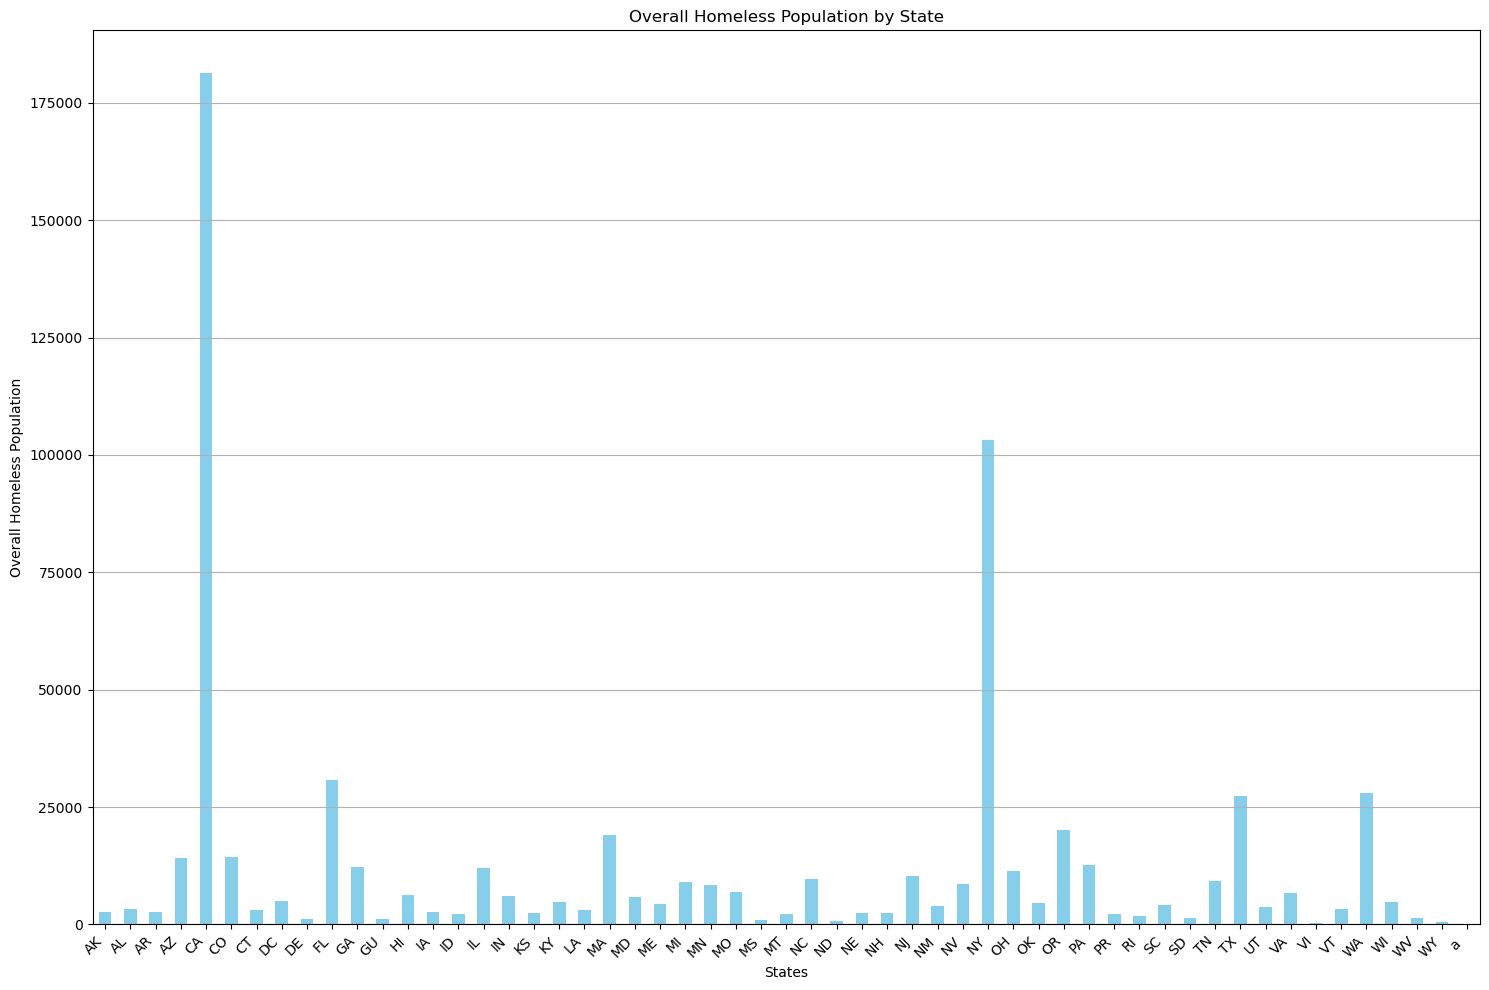

In [15]:
overall_homeless_by_state = cleaned_coc_df.groupby("State")["Overall Homeless"].sum()

# Create a bar chart
plt.figure(figsize=(15, 10))
overall_homeless_by_state.plot(kind="bar", color="skyblue")
plt.title("Overall Homeless Population by State")
plt.xlabel("States")
plt.ylabel("Overall Homeless Population")
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y")
plt.tight_layout()
plt.show()

In [17]:
# Export the Clean DataFrame 

# Export to CSV
cleaned_coc_df.to_csv("../Resources/Clean Data/Clean_CoC_Data.csv", index=False)